In [1]:
# Import Electricity Map utilities
from utils import *

# Enable inline plotting
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Fetch data
country_codes = ['DE', 'DK', 'FR']
df_production = get_production(country_codes, '2017-01-01', '2017-01-16', 60)

Fetching country DE..
Fetching time 2017-01-01T00:00:00+00:00..
Fetching time 2017-01-01T01:00:00+00:00..
Fetching time 2017-01-01T02:00:00+00:00..
Fetching time 2017-01-01T03:00:00+00:00..
Fetching time 2017-01-01T04:00:00+00:00..
Fetching time 2017-01-01T05:00:00+00:00..
Fetching time 2017-01-01T06:00:00+00:00..
Fetching time 2017-01-01T07:00:00+00:00..
Fetching time 2017-01-01T08:00:00+00:00..
Fetching time 2017-01-01T09:00:00+00:00..
Fetching time 2017-01-01T10:00:00+00:00..
Fetching time 2017-01-01T11:00:00+00:00..
Fetching time 2017-01-01T12:00:00+00:00..
Fetching time 2017-01-01T13:00:00+00:00..
Fetching time 2017-01-01T14:00:00+00:00..
Fetching time 2017-01-01T15:00:00+00:00..
Fetching time 2017-01-01T16:00:00+00:00..
Fetching time 2017-01-01T17:00:00+00:00..
Fetching time 2017-01-01T18:00:00+00:00..
Fetching time 2017-01-01T19:00:00+00:00..
Fetching time 2017-01-01T20:00:00+00:00..
Fetching time 2017-01-01T21:00:00+00:00..
Fetching time 2017-01-01T22:00:00+00:00..
Fetching tim

In [3]:
# Show the tail of the data frame
df_production.head()

,country,mode,production,timestamp
0,DE,oil,NaN,2017-01-01 08:00:00+00:00
1,DE,nuclear,6518.0,2017-01-01 08:00:00+00:00
2,DE,gas,1694.0,2017-01-01 08:00:00+00:00
3,DE,biomass,4733.0,2017-01-01 08:00:00+00:00
4,DE,coal,17373.0,2017-01-01 08:00:00+00:00


In [4]:
# Compute % of renewable production in each country
is_renewable = (df_production['mode'] == 'wind') | (df_production['mode'] == 'solar')
df_renewable_production = df_production[is_renewable].groupby(['timestamp', 'country']).sum()
df_renewable_production['total'] = df_production.groupby(['timestamp', 'country']).sum()
df_renewable_production['ratio'] = df_renewable_production['production'] / df_renewable_production['total']
df_renewable_production.head()

,,index,production,total,ratio
timestamp,country,,,,
2017-01-01 00:00:00+00:00,FR,11,680.0,69369.0,0.009803
2017-01-01 01:00:00+00:00,FR,11,680.0,68585.0,0.009915
2017-01-01 02:00:00+00:00,FR,11,666.0,67242.0,0.009905
2017-01-01 03:00:00+00:00,FR,11,659.0,66127.0,0.009966
2017-01-01 04:00:00+00:00,FR,11,709.0,65851.0,0.010767


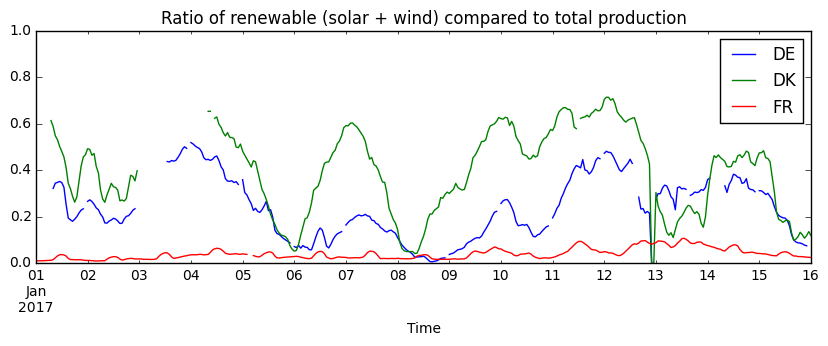

In [7]:
# Plot
plt.figure(figsize=(10,3));
df_renewable_production.filter(['ratio']).unstack().plot(ax=plt.gca());
plt.title('Ratio of renewable (solar + wind) compared to total production');
plt.legend(country_codes);
plt.xlabel('Time');
plt.ylim([0, 1]);